# NVSS Source Counts

In this tutorial we will load the raw NVSS catalogue into python, have a look at the data and plot the Euclidean normalised source counts from this data.

The NVSS is a large area 1.4 GHz survey undertaken with the VLA. It covers the entire sky north of declination -40 degrees and has a limiting flux density of ~2.5 mJy.

The NVSS catalogue that we will be using in this tutorial has been constructed by finding all of the peaks above 2.5 mJy in the images and fitting a 2 dimensional elliptical Gaussian model to each source. The parameters of the elliptical Gaussian fit are:

1) The x,y position of the source (RA and Dec in our case)

2) The peak of the gaussian (in Jy/beam) - beam is the word used by radio astronomers for the resolution.

3) The 2D elliptical parameters of the source - Major Axis, Minor Axis, Position Angle

To start with we will import some required modules and set up some useful initial variables. We will use the module pyfits to load the NVSS catalogue, numpy for array manipulation and matplotlib to do our plotting. This tutorial assumes you have access to the NVSS catalogue in FITS binary table format (this is the standard data product produced from the NVSS survey). If you don't have the file you can download it from the NVSS webpage at http://www.cv.nrao.edu/nvss/ - this page also contains lots of information about the survey with which you may want to familiarse yourself.

NVSSFILE is a string containing the disk location of the NVSS catalogue fits file.
NVSSBEAM is the size of the NVSS resolution element (known as the 'beam' in radio astronomy) in degrees. The NVSS beam is a circular gaussian of width 45 arcseconds, so the width in degrees is 45/3600 (3600 arcseconds in a degree).

In [227]:
import pyfits
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

NVSSFILE='NVSS.fits'
NVSSBEAM=45./3600.

Now we will open the NVSS catalogue using pyfits and look at its structure. The fileptr=pyfits.open(<FILE>) command will load the file into a filepointer.

Fits files are separated into "Header/Data Units" or HDU's. The catalogue data is located in the second HDU in the file (the first just contains general header information about the catalogue).

The catalogue data contained in the second hdu, contains a list of sources with various parameters of each source. These parameters are derived from fits of gaussians at the position of each NVSS source in the survey. To list the names of the fitted parameters in the colums you should open the table (using nvsstable=fileptr[1].data) and then print the names of the columns using nvsstable.names.

In [228]:
#Open the FITS file
fileptr   = pyfits.open(NVSSFILE)
#The NVSS catalogue is in the second HDU and is accesed via the 'data' attribute in the pyfits HDU object
nvsstable = fileptr[1].data
#Print the names of the columns in the data table



Here are some definitions of the columns of the table:
    
    RA(2000): The Right Ascension of the source
    DEC(2000): The declination of the source
    PEAK INT: The peak flux density of the Gaussian fitted to the source
    MAJOR AX: The major axis size of the fitted elliptical Gaussian
    MINOR AX: The minor axis size of the fitted elliptical Gaussian
    POSANGLE: The position angle of the fitted elliptical Gaussian
        
The other columns are not relevant to the tutorial. If you want to find out more about them, check the NVSS website.

Lets extract the required parameters from the catalogue to do the tutorial. I've filled in the first two, you need to add the rest from the list above.

In [229]:
decs = nvsstable['DEC(2000)']    #Declination
ras = nvsstable['RA(2000)']      #Right Ascension
peakflux = nvsstable['PEAK INT']                      #Fitted peak flux density                
majsize =  nvsstable['MAJOR AX']                      #Fitted major axis size
minsize =  nvsstable['MINOR AX']                      #Fitted minor axis size
sourcepa = nvsstable['POSANGLE']                      #Fitted position angle

Now before we do anything else we need to make one important correction.

The flux densities quoted in the raw NVSS catalogue we are using are fitted peak flux densities. We will need to convert the fitted peak flux densities into total flux densities before we can plot the source counts. To calculate the total flux density we just need to multiply the peak flux density by the area of the source. Peak flux densities are measured in units of mJy/beam and total flux density is just in units of mJy, so the area of the source we use should be in units of the beam. The sources in the NVSS catalogue are fitted with an elliptical Gaussian model. The beam of the NVSS (which we defined at the beginning of this tutorial) is also an elliptical Gaussian. We therefore just need to multiply the peak flux densities by the areas in units of the NVSS beam. This should be: totalflux=peakflux x (majsize x minsize) / (NVSSBEAM x NVSSBEAM)

Fill in the correct equation for total flux below.

In [230]:
totalflux  = peakflux*majsize*minsize/(NVSSBEAM*NVSSBEAM)

Now we are ready to make some plots.

First lets plot the distribution of the NVSS catalogue sources on the sky. The code in the block below should do this for you assuming the variables are set up correctly in the previous code blocks. Try and understand what it is doing.

If this code works you should see the NVSS sources above the chosen flux density limit plotted in a Mollweide projection - this projection corrects from the spherical sky to the flat computer screen. Note the isotropy of the radio sources away from the galactic plane.

The minimum flux plotted is set to 1 Jy, try setting this to 100 mJy to see what difference it makes.

In [231]:
3283.*7.081

23246.923000000003

Area 7.08109671014 Sterad 23245.8692451 Square Degrees
Number > 0.2185 Jy is 23249
Or 1.00013468005 per square degree


using a non-integer number instead of an integer will result in an error in the future


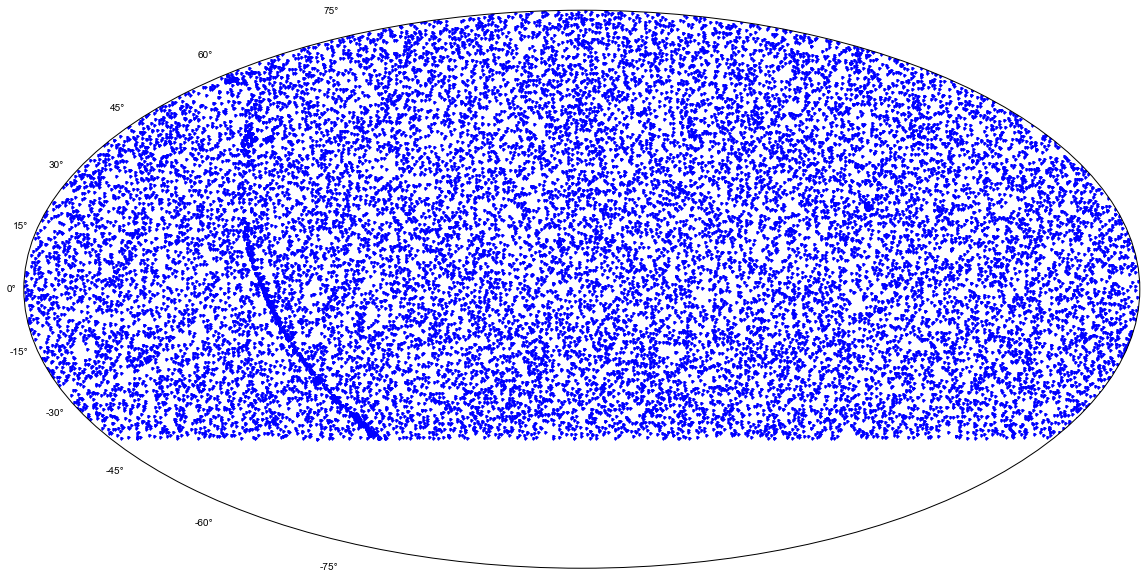

In [232]:
FLUXLIMJY =  0.2185  #Limiting flux for sources to plot.
# area of a cap of a sphere for angle theta = 2*pi*r**2(1-cos(theta))
#for a unit sphere at declination -40
area = 2*np.pi*( 1- np.cos(1-np.radians(-40.))) # sterad
sqdeg=area*np.degrees(1.0)**2
print "Area",area, "Sterad", sqdeg, "Square Degrees"


# Correct the Right Ascensions to work with matplotlib mollweide projection and convert from degrees to radians.
# Subtract 180 deg. as matplotlib plots between -180 and 180 (RA is 0 to 360), 
# and multiply by -1 as RA runs from east to west.
plot_ras = (ras[totalflux>FLUXLIMJY]-180.)*np.pi/180.*-1.0
# Convert declination to radians
plot_decs = (decs[totalflux>FLUXLIMJY])*np.pi/180.

print "Number >",FLUXLIMJY,"Jy is",  len(decs[totalflux>FLUXLIMJY])
print "Or", len(decs[totalflux>FLUXLIMJY])/(area*np.degrees(1.0)**2), "per square degree"
# Set up the figure
figure = plt.figure(figsize=(20,20))
ax = plt.subplot(111, projection='mollweide')
# Dont plot the RA labels (as number dont refect real RA's)
ax.xaxis.set_visible(False)
#Plot
ax.plot(plot_ras,plot_decs,'.')
plot.show()
plot.close()

In [233]:
numsources = nvsstable.shape[0]
minflux = np.min(totalflux)
maxflux = np.max(totalflux)
print numsources,minflux,maxflux

1810672 0.00200056 858.424


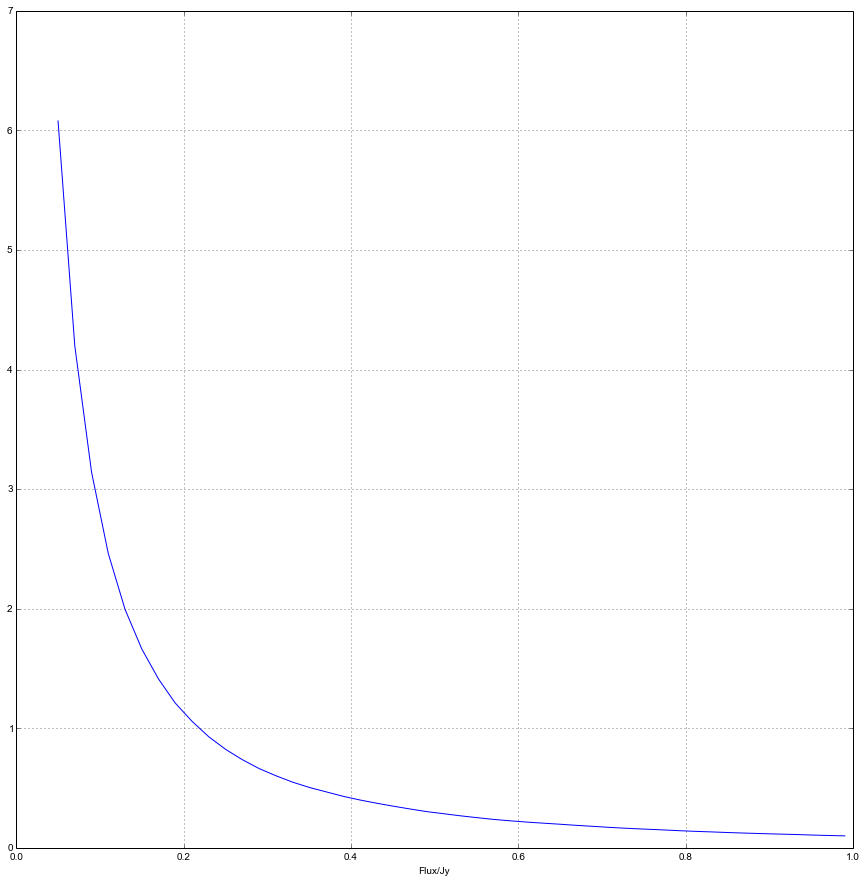

In [234]:
fluxes=np.arange(0.05,1.0,0.02)
conf=np.zeros(len(fluxes))
density=np.zeros(len(fluxes))
#Start count
i=0

for s in fluxes:
    density[i] = len(decs[totalflux>s]) / sqdeg
    conf[i] = density[i]*s
    #print s,density[i],conf[i]
    i=i+1
#print density
figure = plt.figure(figsize=(15,15))
plt.xlabel("Flux/Jy")
#plt.ylabel("conf")
#plt.plot(fluxes,conf)
plt.plot(fluxes,density)
plt.grid()
plt.show()
plt.close()


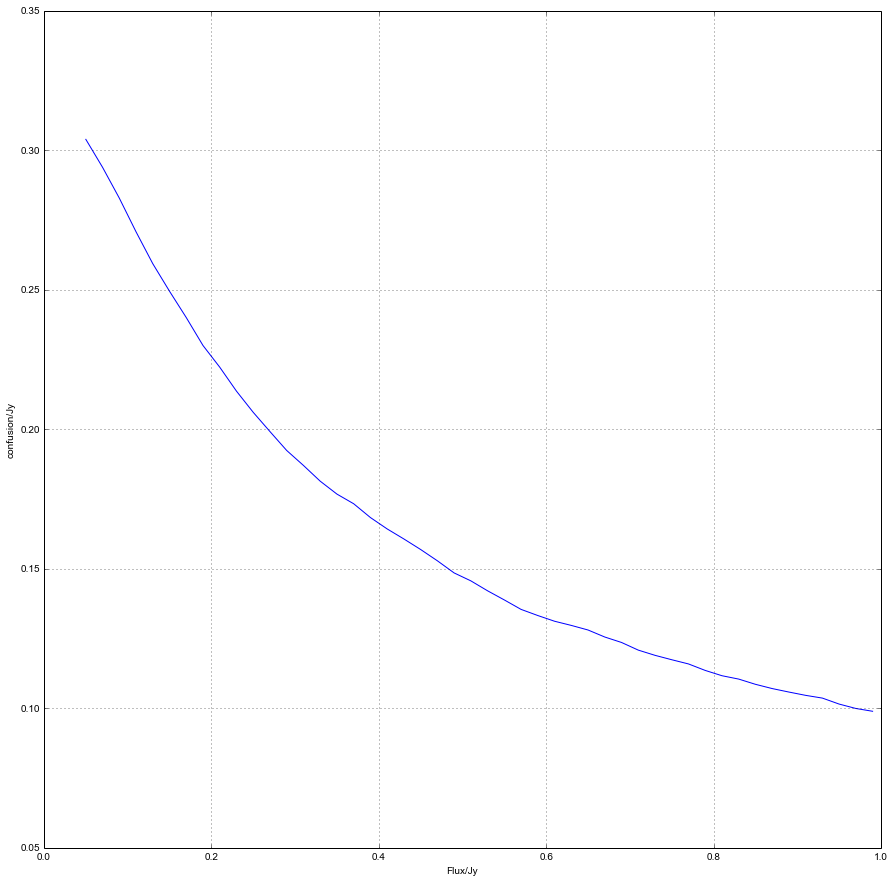

In [235]:
figure = plt.figure(figsize=(15,15))
plt.xlabel("Flux/Jy")
plt.ylabel("confusion/Jy")
plt.plot(fluxes,conf)
plt.grid()
plt.show()
plt.close()
